<a href="https://colab.research.google.com/github/eaguilar98/python_portfolio/blob/main/emm_knn_%26_metrics_for_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SETUP

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## KNN

En ML, el método más sencillo de clasificación es el de los K vecinos más cercanos (en inglés K-nearest neighbors, k-NN) y es un método no paramétrico

Características del algoritmo:

1. Una observación es clasificada como perteneciente a una clase si la mayoría de sus k vecinos pertenecen a esa clase

2. Para evitar empates, se prefiere que el número de vecinos k seleccionado sea un número impar. 

3. La palabra "cercano" implica una métrica de distancia. Típicamente se puede usar la distancia Euclidiana:

__NOTA__: existe una versión de este algoritmo para resolver problemas de regresión

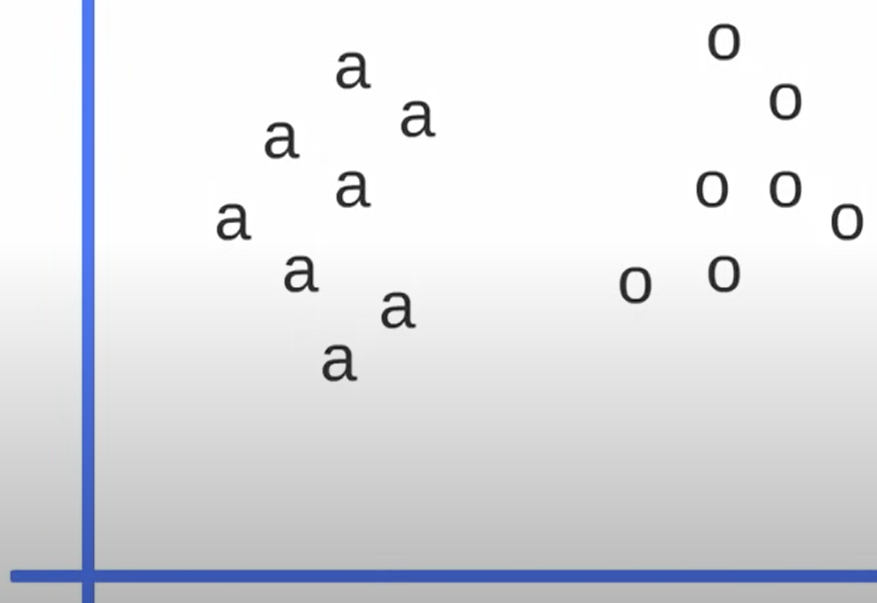

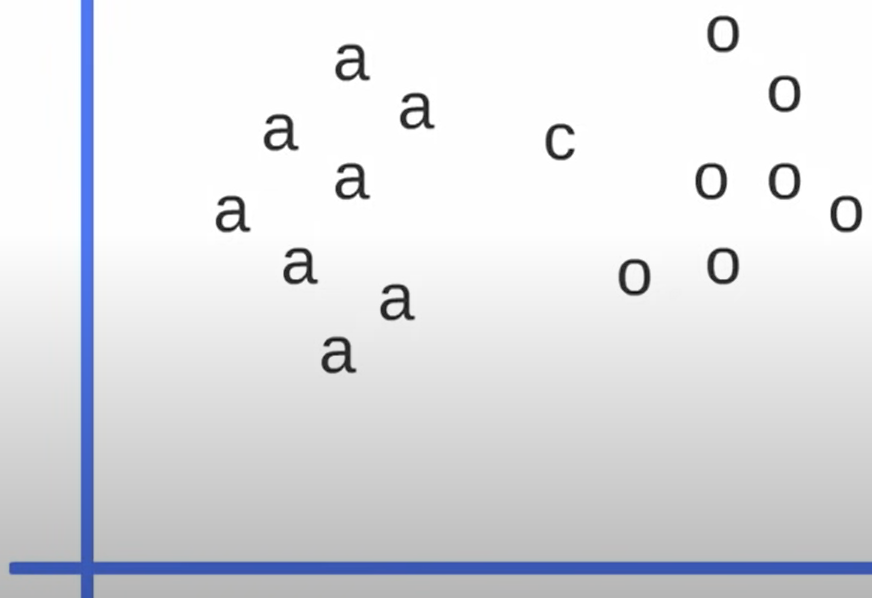

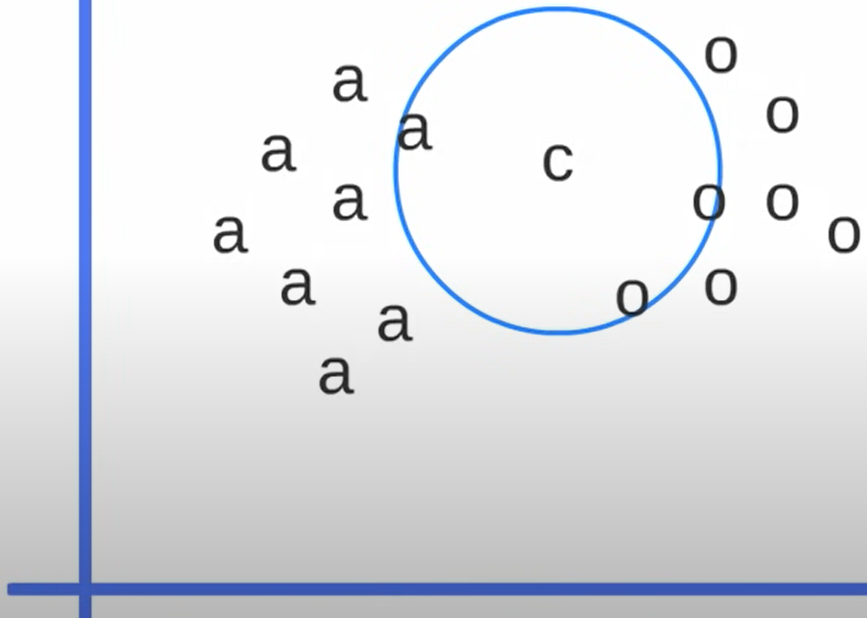

### Implementación en python

En el siiguiente problema estamos interesados en clasificar imagenes con digitos pares

__NOTA__: a la clase de interes le llamamos __clase positiva__ y le asignamos el valor __1__

In [ ]:
#@title Cargamos los datos de digits
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

<Figure size 432x288 with 0 Axes>

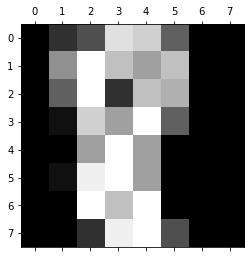

In [ ]:
#@title visualizamos algunos datos
import matplotlib.pyplot as plt

plt.gray()
plt.matshow(digits.images[76])
plt.show()

Creamos un Data Frame y agregamos la variable target de par_impar, donde:

* clase __0__ son los digitos impares
* clase __1__ son los digitos pares

In [ ]:
import pandas as pd
import numpy as np

Digitos = pd.DataFrame(digits.data)
Digitos['target'] = np.array([1 if i in [0, 2, 4, 6, 8] else 0 for i in digits.target])

In [ ]:
Digitos2 = (Digitos
            .copy()
            .assign(Valor_del_digito = digits.target)
            )

In [ ]:
Digitos2.head(8)

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,target,Valor_del_digito
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,1,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,1,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,1,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,1,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,0,7


In [ ]:
Digitos.shape

(1797, 65)

In [ ]:
Digitos.head(7)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,1
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,1
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,0
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,1


In [ ]:
# Digitos.head(7)

In [ ]:
X = Digitos.copy().drop(columns = ['target'])
y = Digitos.copy().target

Instanciamos el clasificador con `k=3`

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)

Ajustamos los datos

In [ ]:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn.predict(X)

array([1, 0, 1, ..., 1, 0, 1])

In [ ]:
(pd.DataFrame(zip(knn.predict(X), Digitos['target']))
.rename(columns = {0:'pronostico', 1:'valor_real'})
.assign(FREQ = 1)
.groupby(['valor_real', 'pronostico'])
.agg({'FREQ':'sum'})
.reset_index()
.sort_values(by = ['valor_real', 'pronostico'])
)

,valor_real,pronostico,FREQ
0,0,0,904
1,0,1,2
2,1,0,7
3,1,1,884


En este ejemplo, hemos clasificado digitos pares e impares, pero

__QUE TAN BIEN HA APRENDIDO A CLASIFICAR EL ALGORTIMO?__

In [ ]:
(pd.DataFrame(zip(np.array([0 if i in [1, 3, 5, 7, 9] else 1 for i in digits.target]), knn.predict(X)))
   .rename(columns = {0:'valor_real', 1:'pronostico'})
   .assign(FREQ = 1)
   .groupby(['valor_real', 'pronostico'])
   .agg({'FREQ':'sum'})
)

FREQ
valor_real pronostico      
0          0            904
           1              2
1          0              7
           1            884

__Como interpretamos y evaluamos el resultado de arriba?__

Una forma de evaluar el modelo es viendo que tan exacto es, al dividir todos los resultados que clasifico correctamente sobre el total

In [ ]:
(904 + 878)/(904 + 2 + 13 + 878)

0.991652754590985

## Metricas para clasificación

En los problemas de clasificación, hemos usado el __accuracy__ (fracción de muestras clasificadas correctamente) para medir el performance del modelo, sin embargo, __accuracy__ no siempre es una medida útil.

Consideremos un problema de clasificación de spam donde el 99% de los emeails son reales y únicamente el 1% restante es spam.

Si construimos un modelo que simplemente clasifique todos los emails como reales así sin mayor ciencia, entonces este modelo será correcto el 99% de las veces y por lo tanto, si evaluamos el __accuracy__ este siempre sera del 99%, el cual puede parecer muy bueno, pero este clasificador realmente hace un pesimo trabajo al clasificar spam (recordemos que todo lo clasifica como real). Este clasificador no nos ayuda en nada a resolver nuestro problema original de derectar spam, es un clasificador que todo lo etiqueta como real y sin embargo tiene un __accuracy__ muy alto.

Esta situación donde una clase es mas frecuente que otra se le conoce como __class imbalance__, la clase de los mails reales es mucho mas grande que la de spam. Esta problema de desbalanceo es muy frecuente en la practica y requiere una métrica más especializada que pueda ayudarnos a evaluar el performance del modelo.

### Matriz de confusión

Dado un problema de clasificación binara (como el ejemplo de spam), podemos construir una matriz que resuma el performance del modelo, a esta matriz se le conoce como la __matriz de confusión__.

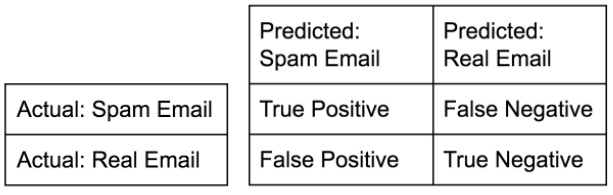

In [ ]:
TP = 884
TN = 904
FP = 2
FN = 7

* Las columnas representan las etiquetas que predijo el modelo
* Las filas representan las etiquetas reales

En las entradas de la matriz se colocan las siguientes cantidades:

* celda superior izquierda: cantidad de emails spam que fueron correctamente clasificados

* celda inferior derecha: cantidad de emails reales que fueron correctamente clasificados

* celda superior derecha: cantidad de emails spam que nuestro clasificador pronostico incorrectamente como reales

* celda inferior izquierda: cantidad de emails reales que nuestro clasificador pronostico incorrectamente como spam

__NOTA__: la clase positiva se refiere a la clase en la que estamos interesados (la clase de interes), en el ejemplo estamos interesados en los spams por lo tanto un __positivo verdadero__ es un correo clasificado como spam que realmente es spam, un __falso positivo__ es un correo clasificado como spam que realmente no era spam, un __negativo verdadero__ es un correo clasificado como email real que realmente es un email real y un __falso negativo__ es un correo clasificado como un email real pero que realmente es spam.

Podemos construir matrices de confusión con los pronosticos de cualquier modelo de clasificación.

### Implementación en python

In [ ]:
from sklearn.metrics import confusion_matrix

Usando el ejemplo de los digitos

In [ ]:
print(confusion_matrix(y, knn.predict(X)))

[[904   2]
 [  7 884]]


La matriz de confusión es muy importante porque a partir de ahi podemos construir otras métricas muy importantes

#### Accuracy

__Accuracy__ (Exactitud). Responde a la pregunta __¿Con qué frecuencia está en lo correcto el clasificador?__ y se define como: la suma de la diagonal de la matriz, dividida por las suma del total de las entradas de la matriz.

$$\frac{tp + tn}{tp + tn + fp + fn} $$

##### Implementación en python

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y, knn.predict(X))

0.994991652754591

#### Recall

__Recall__ (Sensibilidad), Responde a la pregunta __Cuando en realidad es un resultado positivo, ¿con qué frecuencia predice correctamente?__ y se define como: el número de positivos verdaderos dividido por la suma de positivos verdaderos y falsos negativos (también se le conoce como hit rate).

$$\frac{tp}{tp +fn} $$

__NOTA__: Alta sensibilidad significa que el clasificador predijo correctamente la mayoría de las clases positivas

##### Implementación en python

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall_score(y, knn.predict(X))

0.9921436588103255

#### Precision

__Precision__ (Presisión), Responde a la pregunta __Cuando predice el resultado positivo, ¿Con qué frecuencia es correcto?__ y se define como: el número de positivos verdaderos dividido por la suma de positivos verdaderos y falsos positivos.

$$\frac{tp}{tp +fp} $$

__NOTA__: Alta precisión significa que el clasificador tuvo una tasa baja de falsos positivos

##### Implementacion en python

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
precision_score(y, knn.predict(X))

0.9977426636568849

#### F1 score

__F1-score__, Es útil cuando necesitamos tener en cuenta tanto la precisión como la sensibilidad. ya que si solo consideramos optimizar la sensibilidad, el algoritmo predecirá que la mayoría de los casos pertenecen a la clase positiva, pero eso dará como resultado muchos falsos positivos y, por lo tanto, una baja precisión. Por otro lado, si solo consideramos optimizar la precisión, el algoritmo predecirá muy pocos casos como resultados positivos (los que tienen mayor probabilidad), pero la sensibilidad será muy baja. Por eso el __F1-score__ es la media armónica entre presición y sensibilidad y se define como: el doble del producto de la presición y la sensibilidad dividido por la suma de la presición y la sensibilidad.

$$2 \frac{(precision)(recall)}{precision + recall} $$

##### Implementación en python

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(y, knn.predict(X))

0.9949352841868317

### Reporte de clasificación

Si queremos un reporte detallado con las métricas, en scikit learning podemos importar __`classification_report`__ del módulo __metrics__

```python
from sklearn.metrics import classification_report
```

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y, knn.predict(X)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       906
           1       1.00      0.99      0.99       891

    accuracy                           0.99      1797
   macro avg       1.00      0.99      0.99      1797
weighted avg       1.00      0.99      0.99      1797



## Ejercicios

Obten las metricas vistas para las siguientes matrices de confusión

$$\begin{pmatrix}
700 & 0 \\ 
800 & 0 \\
\end{pmatrix}$$

In [ ]:
# TP, FN
# FP, TN



$$\begin{pmatrix}
0 & 700 \\ 
0 & 800 \\
\end{pmatrix}$$

$$\begin{pmatrix}
0 & 700 \\ 
800 & 0 \\
\end{pmatrix}$$

$$\begin{pmatrix}
700 & 0 \\ 
0 & 800 \\
\end{pmatrix}$$

$$\begin{pmatrix}
6 & 914 \\ 
457 & 1000 \\
\end{pmatrix}$$

$$\begin{pmatrix}
5000 & 914 \\ 
457 & 30 \\
\end{pmatrix}$$